In [294]:
import numpy as np
import random
#import sys
#sys.path.insert(1,'/home/asitp/CAVITY_LIGAND/SCALED')

In [295]:
#cd ../

In [296]:
#random.seed(0)
#np.random.seed(0)

In [297]:
scaled_data = np.load("all_scaled_sorted_input.npy")

In [298]:
encoded = np.load("3_TAE_lat_lag_8_seed.npy")

In [299]:
print(encoded)

[[-1.9022131   0.4170282 ]
 [-2.4042199   0.28124633]
 [-2.301366    0.3169871 ]
 ...
 [-0.0874407   0.99621105]
 [-0.00984496  1.0359002 ]
 [ 0.05647779  1.0108786 ]]


In [300]:
encoded.shape

(4022018, 2)

In [301]:
scaled_data = scaled_data.reshape(scaled_data.shape[0]*scaled_data.shape[1],scaled_data.shape[2])
print(scaled_data.shape)

(4022018, 2)


In [302]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyemma
import mdtraj

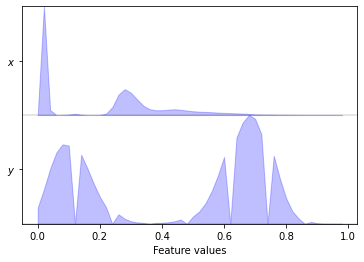

In [303]:
# pyemma.plots.plot_feature_histograms(scaled_data, feature_labels=['$x$', '$y$']);

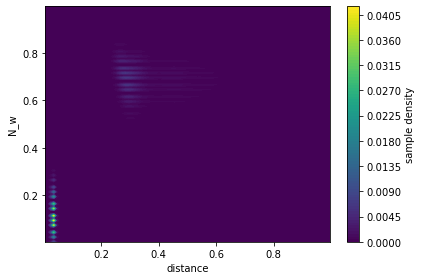

In [304]:
# fig, ax, misc = pyemma.plots.plot_density(scaled_data[:,0],scaled_data[:,1],avoid_zero_count=True)
# ax.set_xlabel('distance')
# ax.set_ylabel('N_w')
# fig.tight_layout()

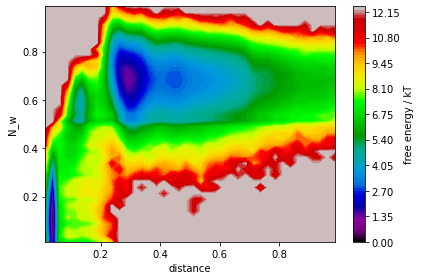

In [305]:
# fig, ax, misc =pyemma.plots.plot_free_energy(scaled_data[:,0],scaled_data[:,1],nbins=40,
#                                              legacy=False,avoid_zero_count=True)
# ax.set_xlabel('distance')
# ax.set_ylabel('N_w')
# fig.tight_layout()
# plt.savefig('original_data_1.png' ,dpi=300)

In [306]:
scaled_en_0 = (encoded[:,0]-np.min(encoded[:,0]))/(np.max(encoded[:,0])-np.min(encoded[:,0]))

In [307]:
scaled_en_1 = (encoded[:,1]-np.min(encoded[:,1]))/(np.max(encoded[:,1])-np.min(encoded[:,1]))

In [308]:
#scaled_encoded = np.array([scaled_en_0,scaled_en_1])

In [309]:
scaled_encoded = np.column_stack([scaled_en_0,scaled_en_1])

In [310]:
np.shape(scaled_encoded)

(4022018, 2)

In [311]:
#np.max(scaled_encoded[:,1])

In [312]:
#fig=pyemma.plots.plot_free_energy(scaled_encoded[:,0],scaled_encoded[:,1],nbins=30,
                                             #legacy=False,avoid_zero_count=True)

In [313]:
cluster_kmeans = pyemma.coordinates.cluster_kmeans(scaled_encoded, max_iter=1500, k=500)
                                                   
                                                  

initialize kmeans++ centers:   0%|          | 0/1000 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

In [244]:
#dtraj = np.save('dtraj_clustered_k800.npy',cluster_kmeans.dtrajs)

In [319]:
# print(np.shape(cluster_kmeans.dtrajs))

(1, 4022018)


Build the ## MSM ## **Model**

In [321]:
lags=[2,10,20,40,60,80,110, 140, 170, 200, 240]

In [247]:
#its = pyemma.msm.its(cluster_kmeans.dtrajs,lags=lags, nits =50, errors='bayes')

In [322]:
its =pyemma.msm.its(list(np.concatenate(cluster_kmeans.dtrajs).reshape(4018,1001)),lags=lags, nits =50,errors='bayes')

estimating MaximumLikelihoodMSM:   0%|          | 0/11 [00:00<?, ?it/s]

/home/asitp/anaconda3/lib/python3.8/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)


In [249]:
#its_1 =pyemma.msm.its(list(np.concatenate(cluster_kmeans.dtrajs).reshape(4018,1001)),lags=lags, nits =20, errors='bayes')

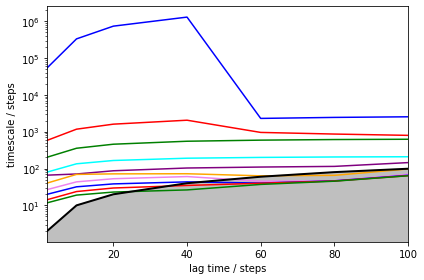

In [323]:
fig = pyemma.plots.plot_implied_timescales(its,nits=15, ylog=True)
plt.xlim(2,100)
plt.tight_layout()
plt.savefig('its_4.png', dpi =300)

In [251]:
# fig = pyemma.plots.plot_implied_timescales(its_1,nits=50, ylog=True)
# plt.xlim(0,400)
# plt.savefig('its_400_concatenated.png', dpi =300)

In [352]:
msm = pyemma.msm.estimate_markov_model(cluster_kmeans.dtrajs, lag=50)


estimating MaximumLikelihoodMSM:   0%|          | 0/9 [00:00<?, ?it/s]

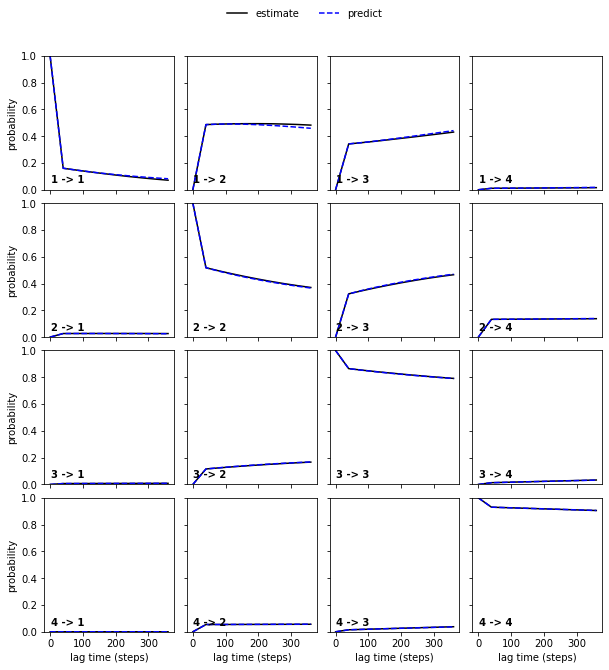

In [353]:
fig=pyemma.plots.plot_cktest(msm.cktest(5))

plt.savefig('cktest_7.png', dpi = 300)

In [328]:
print('fraction of states used = {:f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:f}'.format(msm.active_count_fraction))

fraction of states used = 1.000000
fraction of counts used = 1.000000


In [329]:
# print(msm.stationary_distribution)
# print('sum of weights = {:f}'.format(msm.pi.sum()))

[1.04551433e-03 4.92840889e-03 5.76263399e-03 7.57326707e-04
 3.47887657e-03 1.12482612e-03 8.25956223e-04 1.30607061e-03
 2.34960389e-04 8.02845315e-04 1.26802801e-04 5.50229977e-04
 2.20614301e-03 1.34509861e-03 2.70761633e-04 1.31328085e-03
 3.05222211e-03 1.18174141e-03 1.29787788e-03 3.12285933e-04
 1.13724858e-03 5.19150529e-04 6.79713642e-03 2.40058893e-03
 7.83194064e-05 1.67257060e-03 1.16110978e-03 2.71634470e-03
 5.94227563e-04 1.16061911e-03 1.11636275e-04 2.88240559e-03
 6.08331047e-03 4.71910431e-04 4.94779959e-05 1.02387156e-03
 5.31830844e-04 3.73947491e-04 8.59521862e-04 8.08817015e-04
 6.86227832e-05 3.70960846e-03 3.80406444e-05 6.43212260e-04
 1.35431889e-03 1.12382237e-04 1.97416476e-04 2.57611352e-03
 1.09074092e-03 8.82655649e-04 2.51420909e-03 5.93736264e-04
 5.32174686e-03 5.94235252e-05 8.30176211e-04 1.82745245e-04
 1.14395058e-03 1.26131296e-03 1.38638966e-03 1.98608276e-03
 2.07461300e-03 1.22801755e-03 1.00048958e-03 2.28742571e-05
 1.50497728e-03 5.174100

In [256]:
#np.shape(msm.trajectory_weights())

(1, 4022018)

In [257]:
#np.shape(scaled_data.T)

(2, 4022018)

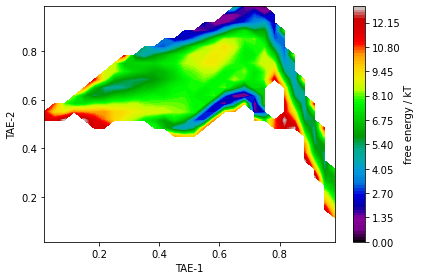

In [330]:
fig, ax, misc = pyemma.plots.plot_free_energy(
    *scaled_encoded.T,nbins=30,
    weights=np.concatenate(msm.trajectory_weights()),
    legacy=False)
ax.set_xlabel('TAE-1')
ax.set_ylabel('TAE-2')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
fig.tight_layout()
plt.savefig('reweighted_fes_4.png',dpi =300)

In [259]:
import pickle

pickle.dump(cluster_kmeans, open("cluster_2.pkl", "wb"))
#pickle.dump(bayesian_msm, open("bayesian_msm.pkl", "wb"))
pickle.dump(msm, open("msm_2.pkl", "wb"))
#pickle.du

In [260]:
# cluster_kmeans.save('msm_cluster.pyemma')
# #, model_name='doublewell_cluster', overwrite=True)
# #msm.save('nb4.pyemma', model_name='doublewell_msm', overwrite=True)
# #bayesian_msm.save('nb4.pyemma', model_name='doublewell_bayesian_msm', overwrite=True)

In [354]:
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm.pi[s].sum()))

π_1 = 0.003112
π_2 = 0.139834
π_3 = 0.449255
π_4 = 0.407799


In [355]:
nstates=5
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / steps:


,1,2,3,4
1,0.00,312.41,497.44,16318.05
2,55272.85,0.00,470.22,16010.57
3,60143.75,2859.37,0.00,15459.76
4,71618.27,14479.47,11163.96,0.00


In [263]:
# score_tae = pyemma.coordinates.vamp(encoded, dim=2).score(
#         test_data=encoded,
#         score_method='VAMP2')
# print('VAMP2-score TAE coordinates: {:.2f}'.format(score_tae))

In [264]:
# score_org = pyemma.coordinates.vamp(scaled_data[:], dim=2).score(
#         test_data=scaled_data,
#         score_method='VAMP2')
# print('VAMP2-score original coordinates: {:.2f}'.format(score_org))

In [356]:
#msm.metastable_distributions.shape

(4, 1000)

<ipython-input-334-c751e31260ee>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  msm.metastable_distributions[i][cluster_kmeans.dtrajs],


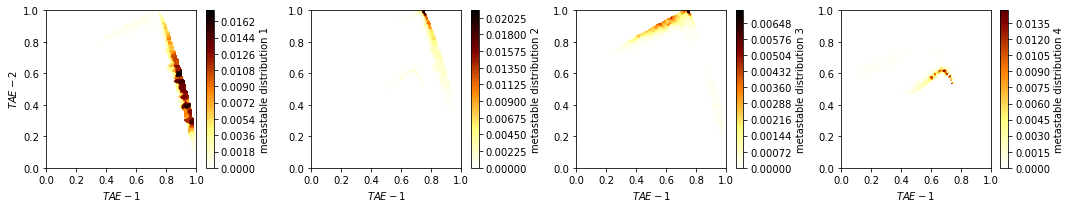

In [334]:
# fig, axes = plt.subplots(1,4,figsize=(15,3))
# for i, ax in enumerate(axes.flat):
#     pyemma.plots.plot_contour(
#         scaled_encoded[:,0],scaled_encoded[:,1],
#         msm.metastable_distributions[tuple(i)][tuple(cluster_kmeans.dtrajs)],
#         ax=ax,
#         cmap='afmhot_r', 
#         mask=True,
#         cbar_label='metastable distribution {}'.format(i + 1))
#     ax.set_xlabel('$TAE-1$')
# axes[0].set_ylabel('$TAE-2$')
# fig.tight_layout()

In [357]:
metastable_traj = msm.metastable_assignments[tuple(cluster_kmeans.dtrajs)]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster_kmeans.clustercenters[msm.active_set[highest_membership]]

In [358]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

In [359]:
#coarse_state_centers

array([[0.8791888 , 0.58889234],
       [0.74895173, 0.9917147 ],
       [0.74895173, 0.9917147 ],
       [0.67973363, 0.6183928 ]], dtype=float32)

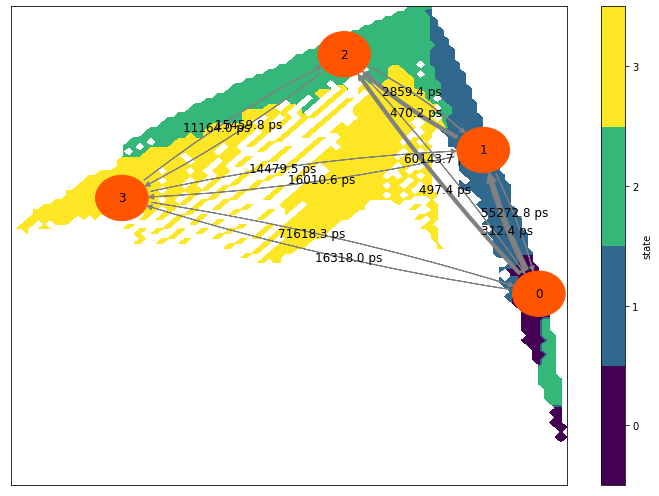

In [386]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *scaled_encoded.T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(0, nstates+1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
     inverse_mfpt,
# #    pos=coarse_state_centers,
#      pos = np.array([[0.95,0.4],
#                      [0.85, 0.70],
#                      [0.6 , 0.9],
#                     [0.2 , 0.6]]),
# #     xpos=np.array([0.8791888,0.7490787,0.80000,0.50973363]),
     state_scale=0.4,
#     #arrow_scale=1.0,
     arrow_curvature=0.5,
#     figpadding=None,
     arrow_label_format='%.1f ps',
     arrow_labels=mfpt,
     size=12,
     show_frame=True,
     ax=ax)

#ax.set_xlabel('$\Phi$')
#ax.set_ylabel('$\Psi$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.savefig('mfpt_plot_5state_500cls.png',dpi=300)